# Import Libraries

In [1]:
import fastai

fastai.__version__

'1.0.61'

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from  google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from fastai.vision import *

# Dataset Load and Manipulation

In [4]:
!unzip "/content/drive/MyDrive/Datasets.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/food-101/Datasets/train/french_onion_soup/1351113.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/856260.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/169990.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/2967688.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/1976644.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/1698324.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/639473.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/2376873.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/3906955.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/349892.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/1062494.jpg  
  inflating: content/food-101/Datasets/train/french_onion_soup/245554.jpg  
  inflating: content/food-101/

In [5]:
# save fastai path 
proj_path = '/content/content/food-101/Datasets/'
p_path = Path(proj_path)
p_path

PosixPath('/content/content/food-101/Datasets')

In [6]:
# data augmentation and pre-processing
# train, validation, test split

# https://fastai1.fast.ai/basic_data.html#DataBunch
# https://fastai1.fast.ai/vision.transform.html#get_transforms
# https://fastai1.fast.ai/vision.data.html#ImageDataBunch.normalize

np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, 
                                  train="train",
                                  test ='test', 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224, num_workers=4).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
filet_mignon,filet_mignon,filet_mignon,filet_mignon,filet_mignon
Path: /content/content/food-101/Datasets;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
macaroni_and_cheese,carrot_cake,garlic_bread,carrot_cake,cup_cakes
Path: /content/content/food-101/Datasets;

Test: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/content/food-101/Datasets

In [7]:
# food classes name
print(data.classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [ ]:
# number of food classes
data.c

101

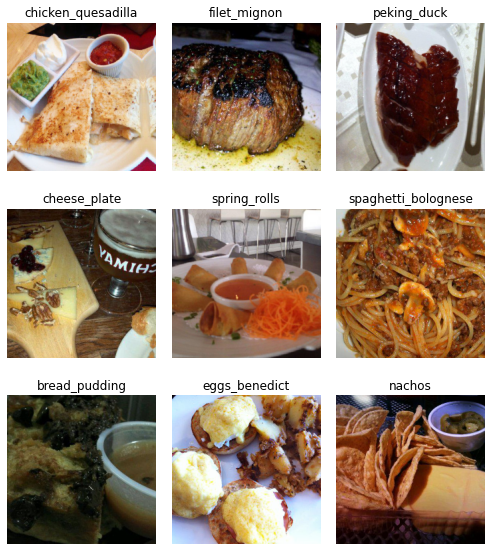

In [ ]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

# Train model

In [ ]:
# create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, 
                    models.resnet34, 
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train model for 20 epochs
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,3.242742,2.378722,0.429307,16:25
1,2.332970,1.812138,0.536172,16:47
2,1.983906,1.630839,0.577558,16:32
3,1.914085,1.555810,0.596040,16:58
4,1.801573,1.488961,0.612475,17:08
5,1.699130,1.427905,0.627525,16:52
6,1.654511,1.372064,0.638878,17:04
7,1.568470,1.328491,0.655776,17:00
8,1.534718,1.307831,0.661320,16:45
9,1.481530,1.273903,0.667129,17:05


* pre-mature training. could have improved with more epochs.
* So no need to optimize learning rate.

# Save Model

In [ ]:
learn.save('model1', return_path=True)

PosixPath('/content/content/food-101/Datasets/models/model1.pth')

In [ ]:
learn.export()
# learn = load_learner('/content/content/food-101/Datasets/')

# Interpretation

In [15]:
def interpret(model_name):
    learn = cnn_learner(data, 
                    models.resnet34, 
                    metrics=accuracy)
    learn.load(model_name)

    # look at some predictions
    learn.show_results()

    #interp = ClassificationInterpretation.from_learner(learn)

    # Plot Loss vs Epoch graph
    #learn.recorder.plot_metrics()
    #learn.recorder.plot_losses()

    # plot results of model on validation set 
    #interp.plot_confusion_matrix()

    # plot top losses (most wrong)
    #interp.plot_top_losses(9)

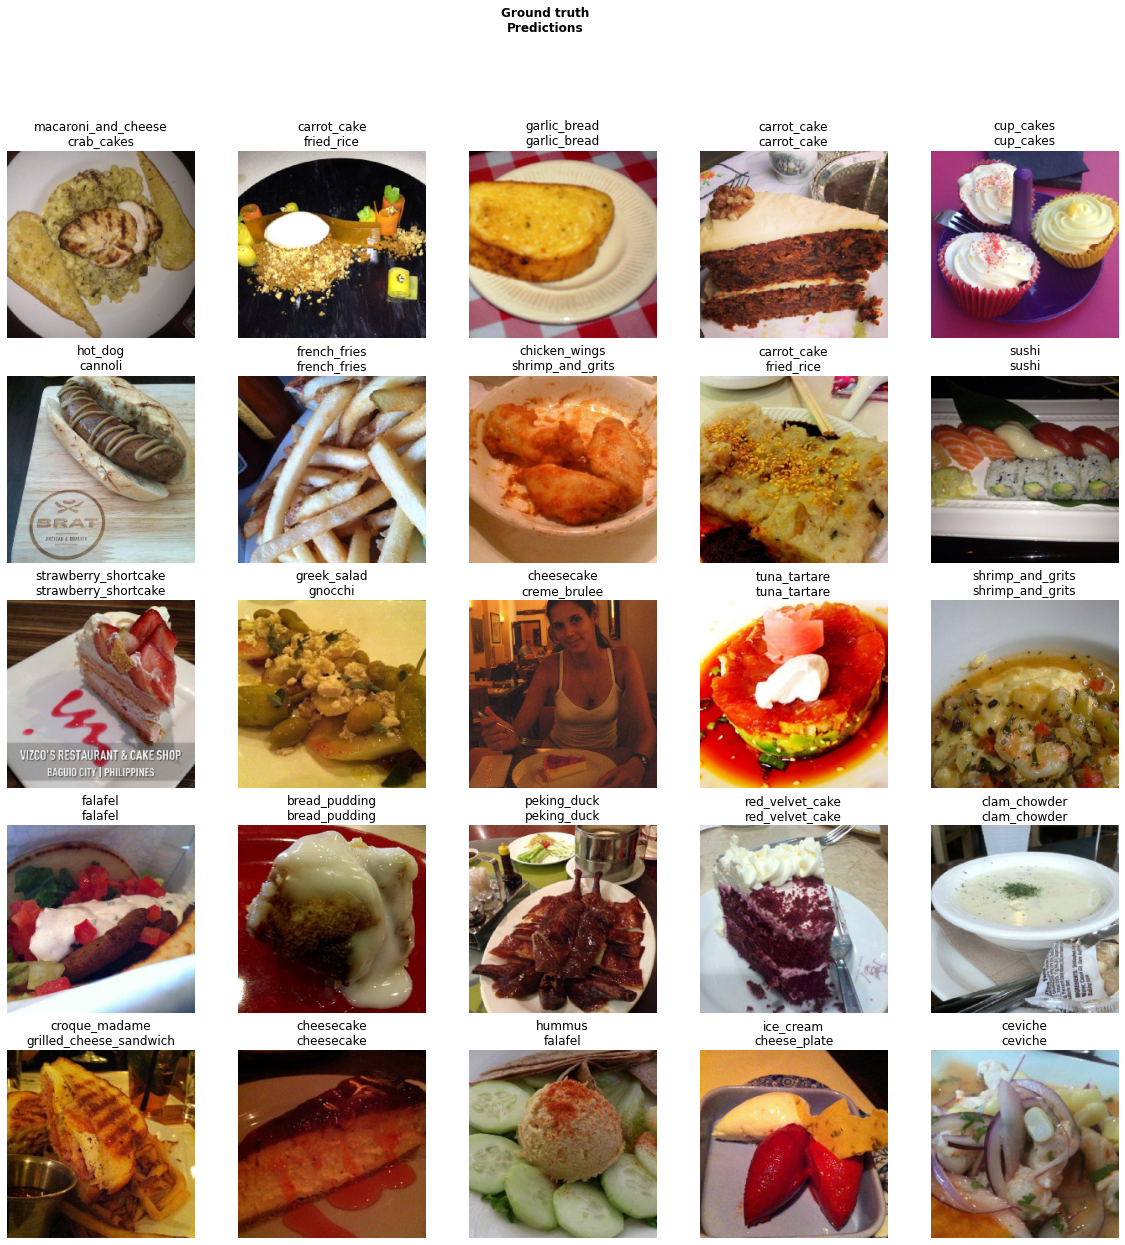

In [17]:
interpret('/content/drive/MyDrive/model1')

# Prediction

In [ ]:
# img = learn.data.test_ds[1][0]
# learn.predict(img)
# img

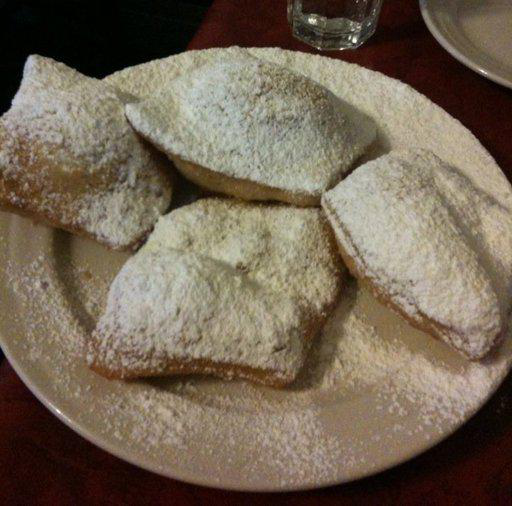

In [ ]:
img= open_image('/content/content/food-101/Datasets/test/beignets/1002850.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
data.classes[int(pred_idx)]

'beignets'

# References
* https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb
* https://fastai1.fast.ai/vision.html
* https://docs.fast.ai/tutorial.vision.html#Classifying-breeds
* https://www.youtube.com/watch?v=vy-R4oUZaC8&list=PL2zq7klxX5AReJn7nZfqOKLZ3IpKj7fwc&index=11